**Engy-5310** Computational Continuum Transport Phenomena, UMass Lowell, Chem. Eng. Nuclear Program Spring 2021; Prof. V. F. de Almeida

# Xenon-135 Removal from Molten Salt Reactors by Helium Gas Bubbles
$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\uvar}{\boldsymbol{u}}
  \newcommand{\fvar}{\boldsymbol{f}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
  \newcommand{\Power}{\mathcal{P}}
$

**Student(s):** Anadi Mondal <br>
**Course:** Engy-5310 Computational Continuum Transport Phenomena  <br>
**Mentor:**Prof. Subash L. Sharma 

UMass Lowell, Dept. of Chemical Engineering, Nuclear Energy Program 
<br>
**27Mar2021**

---
## Table of Contents<a id="toc"></a>
* [Introduction](#intro)
* [Problem Statement](#problem)
* [Objectives](#obj)
* [Approach](#app)
 + [Weak Form of Problem Statement](#weakform)
 + [MOOSE Kernels](#kernels)
 + [Setup](#setup)
 + [Tests](#tests)
   - [1-D](#1d-test)
   - [2-D](#1d-test)
* [Results and Analysis](#ranalysis)
* [Conclusions](#conclusions)
* [References](#refs)
---

## [Introduction](#toc)<a id="intro"></a>

- <p style = text-align:justify;'> Xenon-135 buildup in the molten salt reactor is dangerous for the sustainable running of reactor. As xenon has very high absorption cross section, it absorb neutron which hinders the continuous chain reaction for required power production. So, removing of xenon form the reactor core is must. One of the ways to remove xenon is to sparge helium gas as bubble in the reactor core because xenon is easily absorbed in helium bubble. The amount of xenon transfer to the helium is highly dependent on helium void fraction. If we increase the void fraction of helium in the system it will increase the interfacial area which is responsible for transferring xenon from salt to helium bubble.Actually this simulation has been completed by Anthony et al[1] using ANSYS.Here MOOSE has been used to get same type of result. </p>

## [Problem Statement](#toc)<a id="problem"></a>

- <p style = text-align:justify;'>The Xe-135 is stripped from the Molten salt by interfacial Mass transfer process using the He gas. The general transport equation for this can be written as below: </p>

- The strong form of the two coupled equations are written as,

The mass conservation equation of xenon in salt,
\begin{align*}
( 1- \alpha)v\frac {du} {dx} = -(-D_1 (1-\alpha)\frac{d^2u}{dx^2}(x)) - S(u, u_1) \quad \forall \quad x\in [a,b].......  (1)
\end{align*}
\begin{align*}
u(a) &= A_1, 
\frac{du}{dx}(b)= B_1.
\end{align*}
    
And the conservation equation of xenon in helium gas is as follows,
    
\begin{align*}
\alpha v\frac {du_1} {dx} = -(-D_2 \alpha \frac{d^2u_1}{dx^2}(x)) + S(u, u_1) \quad \forall \quad x\in [a,b]................(2)
\end{align*}
\begin{align*}
u_1(a) &= A_1, 
\frac{du_1}{dx}(b)= B_1.
\end{align*}




### Source coupling:

\begin{align*}
 S(u, u_1) = m \times a_i\bigl(u_1-H\,u_2\bigr)
\end{align*}

Where,m= mass transfer coefficient, $a_{i}$ = interfacial area, H= Henry Constant [4]

### Assumptions:

1.Considering a homogeneous model, means salt and helium bubble are flowing at same speed.

2.Concentration change in one direction(1D problem)

3.Steady State Case

4.The system is dominated by convection ,so diffusion term is negligible, can be ignored


## [Objectives](#toc)<a id="obj"></a>

- To determine the concentration change of Xenon in fuel salt
- To determine the buildup of xenon in helium bubble


In [1]:
'''Domain'''

def show_domain():
    import pyvista as pv
    pv.set_plot_theme('paraview')
    
    coolant = pv.Cylinder(center=(0,0,0), direction=(1,0,0), height=72, radius=2)

    plo = pv.Plotter(notebook=True,shape=(1,1)) 
    plo.add_mesh(coolant, color='orange', opacity=1.0,)
   
    plo.add_axes(xlabel='x', ylabel='R', zlabel='')
    plo.set_viewup([0,1,0])
   
    cpos = plo.show(window_size=[800, 400])

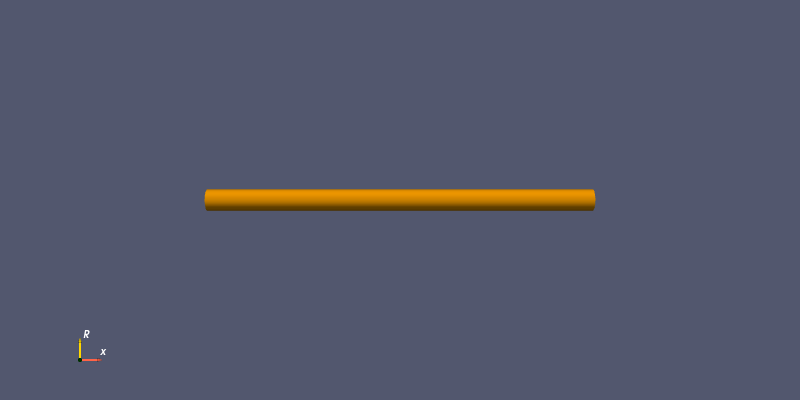

In [2]:
show_domain()

## [Approach](#toc)<a id="app"></a>

### Weak Form of Problem: <a id="weakform"></a>
- The weak form of the two conservation equation can be written as,

The Galerkin weak formulation is as follows. Find $u_1 \in H^1\!\bigl([a,b]\bigr)$ and $u_2 \in H^1\!\bigl([a,b]\bigr)$
so that 

\begin{align*}
 \int\limits_a^b v\, u'(x)\, w(x)\,dx + \int\limits_a^b D_1\, u'(x)\,w'(x)\,dx + \int\limits_a^b S(u, u_2)\,w(x)\,dx &= 0 \quad \forall \quad w \in H^1_0\!\bigl([a,b]\bigr), \text{and}
 \\
  \int\limits_a^b v\, u_1'(x)\, w(x)\,dx + \int\limits_a^b D_2\, u_1'(x)\,w'(x)\,dx - \int\limits_a^b S(u, u_1)\,w(x)\,dx &= 0 \quad \forall \quad w \in H^1_0\!\bigl([a,b]\bigr),
\end{align*}

<p style = text-align:justify;'> where $H^1\!\bigl([a,b]\bigr) := \bigl\{ u:[a,b]\subset\ Reals\rightarrow \ Reals \mid \int_a^b u'^2\,dx < \infty\bigr\}$ and $H^1_0\!\bigl([a,b]\bigr) := \bigl\{ w \mid w \in H^1(a,b), w(a) = 0, w(b)' =0 \bigr\}$. Both function sets as just defined are Hilbert spaces. The function $w$ is called a test function. Because $w$, $u_1$, $u_2$ are sought in very similar sets of functions, this weak form is called Galerkin's weak form. </p>

 1. $\pm S(u, u_1)\,w(x)$.
 
- We don't need any modification of convection and source term to use directly but need to apply integration by parts to get diffustion term.

#### MOOSE kernels <a id="kernels"></a>
##### 1. Diffusion Kernel

Equation 1 :[interface](https://github.com/dpploy/engy-5310/blob/anadi/projects/xenon-removal/include/kernels/DiffusionTerm.h) and [implementation](https://github.com/dpploy/engy-5310/blob/anadi/projects/xenon-removal/src/kernels/DiffusionTerm.C)

Equation 2: [interface](https://github.com/dpploy/engy-5310/blob/anadi/projects/xenon-removal/include/kernels/DiffusionTermm.h) and [implementation](https://github.com/dpploy/engy-5310/blob/anadi/projects/xenon-removal/src/kernels/DiffusionTermm.C)

##### 2. Convection Kernel

Equation 1[interface](https://github.com/dpploy/engy-5310/blob/anadi/projects/xenon-removal/include/kernels/ConvectiveTerm.h) and [implementation](https://github.com/dpploy/engy-5310/blob/anadi/projects/xenon-removal/src/kernels/ConvectiveTerm.C)

Equation 2[interface](https://github.com/dpploy/engy-5310/blob/anadi/projects/xenon-removal/include/kernels/ConvectiveTermm.h) and [interface](https://github.com/dpploy/engy-5310/blob/anadi/projects/xenon-removal/src/kernels/ConvectiveTermm.C)

##### 3. Source Kernel

[interface](https://github.com/dpploy/engy-5310/blob/anadi/projects/xenon-removal/include/kernels/SourceTerm.h) and [implementation](https://github.com/dpploy/engy-5310/blob/anadi/projects/xenon-removal/src/kernels/SourceTerm.C)

#### Parameter values:

> + $a = 0$ ft
> + $b = 6$ ft



| $u_1$ **Parameter** | **Value**  | $u_2$ **Parameter** | **Value** |
|:-------------------:|:----------:|:-------------------:|:---------:|
| $A_1$               | 0.0459 mole/ft3     |  $A_2$              | 0 mole/ft3    |
| $B_1$               | 0 mole/ft^2-hr     |  $B_2$              |  0 mole/ft^2-hr    |
| $D_1$               | $5\times 10^{-5}$ ft^2/hr |  $D_2$              | $9.2\times 10^{-5}$ ft^2/hr  |


#### FEM parameters:

> + Basis Functions: Second Order Lagrangian
> + num. of finite elements: 20

In [3]:

'''Plot function for FEM Solution'''

def plot_solution(df,
                  dimension='Null',
                  title='No Title', 
                  basis_functions_type='No basis functions type',
                  flux_basis_functions_type='No basis functions type'):
    
    import matplotlib.pyplot as plt
    %matplotlib inline
    import numpy as np
    plt.style.use('dark_background') 
    axial="x"
    axial_1="x1"
    axial_2="x2"
    (fig, ax1) = plt.subplots(1, figsize=(14, 5))
    
    #Plotting for concentration and flux of Xenon in Salt
    
    if (axial == dimension):
        ax1.plot(df['x'], df['u'],'r*-',label=basis_functions_type)

        ax1.set_xlabel(r'$x$ [ft]', fontsize=18)
        ax1.set_ylabel(r'$u_h(x)$ [mole/ft3]', fontsize=18, color='red')

        ax1.tick_params(axis='y', labelcolor='red', labelsize=14)
        ax1.tick_params(axis='x', labelsize=14)
        ax1.legend(loc='center left', fontsize=12)
        ax1.grid(True)
        
        ## Flux Plot 
            
        ax2 = ax1.twinx()

        ax2.plot(df['x'], df['diffFluxU_x'],'b*-',label=flux_basis_functions_type)
        
        ax2.set_ylabel(r"$q_h(x)$ [mole/ft2-hr]", fontsize=16, color='lightblue')
        ax2.tick_params(axis='y', labelcolor='lightblue', labelsize=14)
        ax2.legend(loc='center right', fontsize=12)
        
     #Plotting for concentration and flux of Xenon in Helium
    
    if (axial_1 == dimension):
        ax1.plot(df['x'], df['u2'],'r*-',label=basis_functions_type)

        ax1.set_xlabel(r'$x$ [ft]', fontsize=18)
        ax1.set_ylabel(r'$u2_h(x)$ [mole/ft3]', fontsize=18, color='red')

        ax1.tick_params(axis='y', labelcolor='red', labelsize=14)
        ax1.tick_params(axis='x', labelsize=14)
        ax1.legend(loc='center left', fontsize=12)
        ax1.grid(True)
        
        ## Flux Plot 
            
        ax2 = ax1.twinx()

        ax2.plot(df['x'], df['diffFluxU2_x'],'b*-',label=flux_basis_functions_type)
        
        ax2.set_ylabel(r"$q2_h(x)$ [mole/ft2-hr]", fontsize=16, color='lightblue')
        ax2.tick_params(axis='y', labelcolor='lightblue', labelsize=14)
        ax2.legend(loc='center right', fontsize=12)
        
        
    if (axial_2 == dimension):
        ax1.plot(df['x'], df['u'],'r*-',label=basis_functions_type)

        ax1.set_xlabel(r'$x$ [ft]', fontsize=18)
        ax1.set_ylabel(r'$u_h(x)$ [mole/ft3]', fontsize=18, color='red')

        ax1.tick_params(axis='y', labelcolor='red', labelsize=14)
        ax1.tick_params(axis='x', labelsize=14)
        ax1.legend(loc='center left', fontsize=12)
        ax1.grid(True)
        
        ## Flux Plot 
            
        ax2 = ax1.twinx()

        ax2.plot(df['x'], df['u2'],'b*-',label=flux_basis_functions_type)
        
        ax2.set_ylabel(r"$u2_h(x)$ [mole/ft3]", fontsize=16, color='lightblue')
        ax2.tick_params(axis='y', labelcolor='lightblue', labelsize=14)
        ax2.legend(loc='center right', fontsize=12)    
        
    
    plt.title(title, fontsize=20)
  
    plt.show()
    print('') 
    

### Setup <a id="setup"></a>

In [4]:
'''Domain'''

x_a = 0  #ft
x_b = 6  #ft

x_length = x_b - x_a

In [10]:

'''Parameters and data'''

diff_coeff_1 = 0.00005 #ft^2/hr
diff_coeff_2 = 0.000092 #ft^2/hr
Mass_transfer_coeff = 2 #ft/hr
vel = [14735.8 ,0 ,0]  # ft/hr
velocity = 14735.8 #ft/hr 1.247m/s
Void_fraction = 0.002 
Interfacial_area= 7.5 #1/ft
Henry_constant= 2.08e-4 
Length=6 #6 feet
mesh_type = 'edge3'

u_a = 0.0459   #mole/ft^3
u_b = 0        #mole/ft2-hr
u2_a = 0       #mole/ft^3
u2_b = 0       #mole/ft2-hr

peclet_number=(velocity*Length/diff_coeff_1)
print('Peclet number of fluid =  ' + str(peclet_number))  


Peclet number of fluid =  1768295999.9999998


## [Results and Analysis](#toc)<a id="ranalysis"></a>

- <p style = text-align:justify;'> From the graph we can see the concentration of xenon in salt is decreased by a small amount. As the system is dominated by convection, the diffusion has no effect on xenon transfer.Actually here I assumed a constant interfacial area and void. But both should increase from inlet to exit of pipe. For the simplification of model both terms were considered constant. </p>


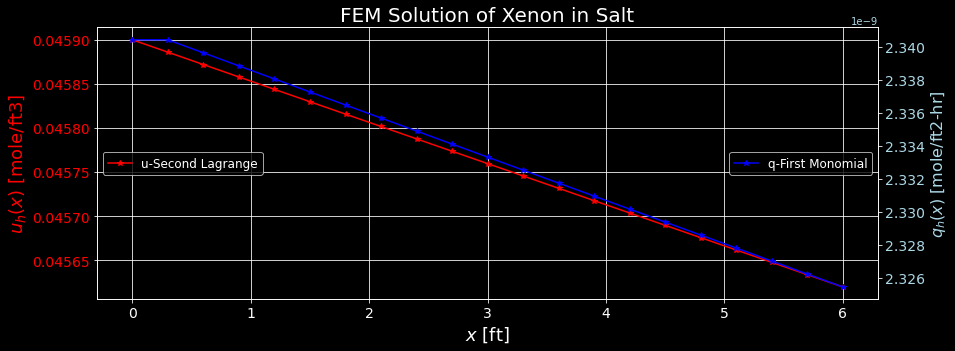

In [6]:

'''Show FEM Solution'''

import pandas as pd
df = pd.read_csv('output_x-data_0002.csv')
    
plot_solution(df, dimension='x', title='FEM Solution of Xenon in Salt', basis_functions_type='u-Second Lagrange', flux_basis_functions_type='q-First Monomial')

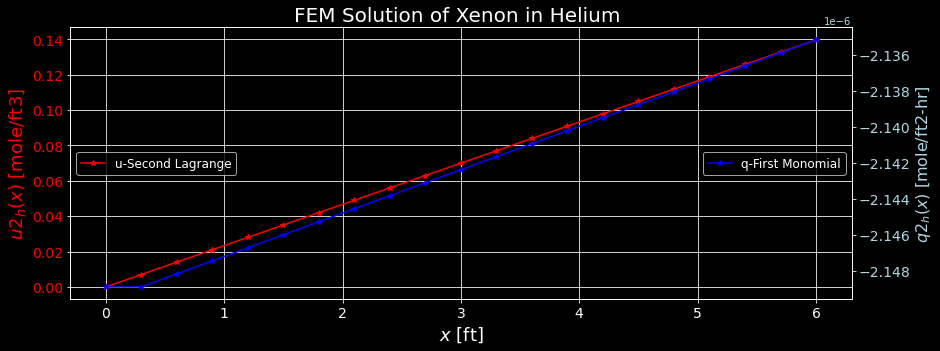

In [7]:

'''Show FEM Solution'''

import pandas as pd
df = pd.read_csv('output_x-data_0002.csv')
    
plot_solution(df, dimension='x1', title='FEM Solution of Xenon in Helium ', basis_functions_type='u-Second Lagrange', flux_basis_functions_type='q-First Monomial')

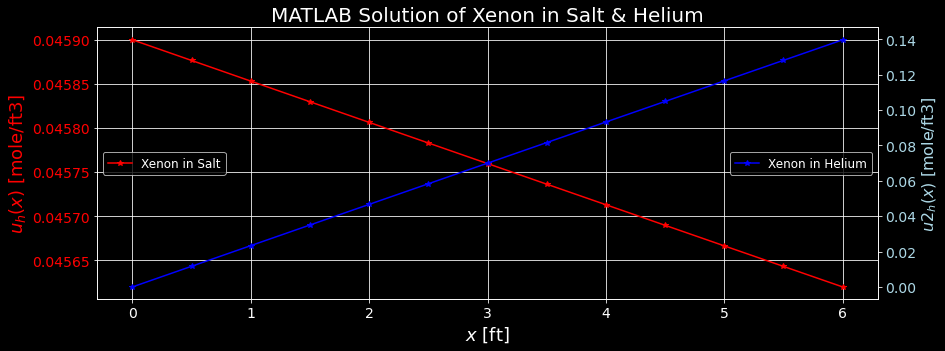

In [8]:
'''Show MATLAB Solution'''

import pandas as pd
df = pd.read_excel('matlab_sol.xlsx')
    
plot_solution(df, dimension='x2', title='MATLAB Solution of Xenon in Salt & Helium', basis_functions_type='Xenon in Salt', flux_basis_functions_type='Xenon in Helium')

## [Conclusions](#toc)<a id="conclusions"></a>

- <p style = text-align:justify;'> The concentration of xenon in fuel salt is decreased due to transfer of xenon from salt to helium bubble. MOOSE and analytical solution gave the same result. To improve the result I need to consider several variable term in the governing equation. This is the simplest forms and considerations to simulate the concentration change of xenon in molten salt reactor. </p>

## [References](#toc)<a id="refs"></a>

- [1] V. F. de Almeida, [*Engy-5310: Computational Continuum Transport Phenomena*](https://github.com/dpploy/engy-5310), University of Massachusetts Lowell, Dept. of Chemical Engineering (Nuclear Energy Program).
- [2] Multiphysics Object-Oriented Simulation Environment [(MOOSE)](https://mooseframework.org)
- [3] A.Bowers J,S. Sharma,M. Howley, “CFD Analysis of xenon-135 reomoval from molten salt reactors by helium gas bubbles”. ANS Conference,2020.
- [4] R.J Kedl,A. Houfzeel,"Development of a model for computing Xe-135 migration in MSRE".Oak Ridge National Laboratory .